# Projeto 2

## Importando os dados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [98]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, MaxPool2D, Dropout

In [2]:
from numpy.random import seed
seed(42)

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importando
train_data = pd.read_csv("C:\\Users\\malta\\Desktop\\Pós Graduação\\Redes neurais\\Projeto 2\\Vulcões em Jupiter\\Volcanoes_train\\train_images.csv", header = None)
test_data = pd.read_csv("C:\\Users\\malta\\Desktop\\Pós Graduação\\Redes neurais\\Projeto 2\\Vulcões em Jupiter\\Volcanoes_test\\test_images.csv", header = None)
train_labels = pd.read_csv("C:\\Users\\malta\\Desktop\\Pós Graduação\\Redes neurais\\Projeto 2\\Vulcões em Jupiter\\Volcanoes_train\\train_labels.csv")
test_labels = pd.read_csv("C:\\Users\\malta\\Desktop\\Pós Graduação\\Redes neurais\\Projeto 2\\Vulcões em Jupiter\\Volcanoes_test\\test_labels.csv")

In [3]:
#Cada imagem é uma das linhas das 12100 colunas
print( train_data.shape )
print( test_data.shape )
print( train_labels.shape )
print( test_labels.shape )

(7000, 12100)
(2734, 12100)
(7000, 4)
(2734, 4)


## Análise exploratória: Proporção de imagens que contêm vulcões

In [177]:
train_labels['Volcano?'].value_counts()

0    6000
1    1000
Name: Volcano?, dtype: int64

In [193]:
test_labels['Volcano?'].value_counts()

0    2300
1     434
Name: Volcano?, dtype: int64

In [178]:
train_labels['Volcano?'].value_counts()/len(train_labels)

0    0.857143
1    0.142857
Name: Volcano?, dtype: float64

In [194]:
test_labels['Volcano?'].value_counts()/len(test_labels)

0    0.841258
1    0.158742
Name: Volcano?, dtype: float64

In [124]:
train_labels[train_labels['Volcano?'] == 1]['Type'].value_counts()

4.0    362
3.0    346
2.0    187
1.0    105
Name: Type, dtype: int64

In [192]:
train_labels[train_labels['Volcano?'] == 1]['Type'].value_counts()/1000

4.0    0.362
3.0    0.346
2.0    0.187
1.0    0.105
Name: Type, dtype: float64

In [9]:
train_labels[train_labels['Volcano?'] == 1]['Type'].value_counts().index.sort_values('Speed', ascending=True)

(Float64Index([1.0, 2.0, 3.0, 4.0], dtype='float64'),
 array([3, 2, 1, 0], dtype=int64))

In [10]:
train_counts = train_labels['Volcano?'].value_counts()
test_counts = test_labels['Volcano?'].value_counts()

Text(0.5, 1.0, 'Número de vulcões por imagem')

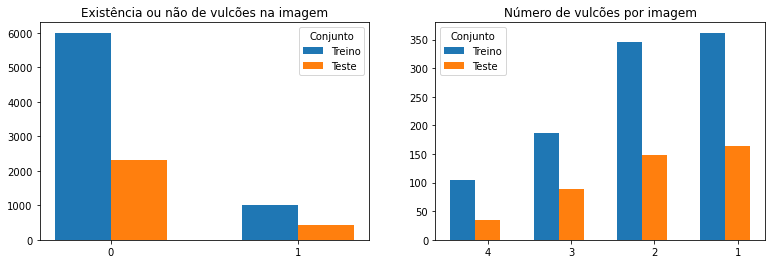

In [88]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13,4))


ax1.bar(train_counts.index-0.15, train_counts.values, width=0.3, label="Treino",tick_label = ["0","1"],align='edge')
ax1.bar(test_counts.index+0.15, test_counts.values, width=0.3, label="Teste",tick_label = ["0","1"],align='edge')
ax1.legend(title="Conjunto")
ax1.set_title("Existência ou não de vulcões na imagem")

ax2.bar(train_labels[train_labels['Volcano?'] == 1]['Type'].value_counts().index-0.15,
        train_labels[train_labels['Volcano?'] == 1]['Type'].value_counts().values,
        tick_label = ['1','2','3','4'],width=0.3, label="Treino")
ax2.bar(test_labels[test_labels['Volcano?'] == 1]['Type'].value_counts().index+0.15,
        test_labels[test_labels['Volcano?'] == 1]['Type'].value_counts().values+0.15,
        tick_label = ['1','2','3','4'],width=0.3, label="Teste")
ax2.legend(title="Conjunto")
ax2.set_title("Número de vulcões por imagem")

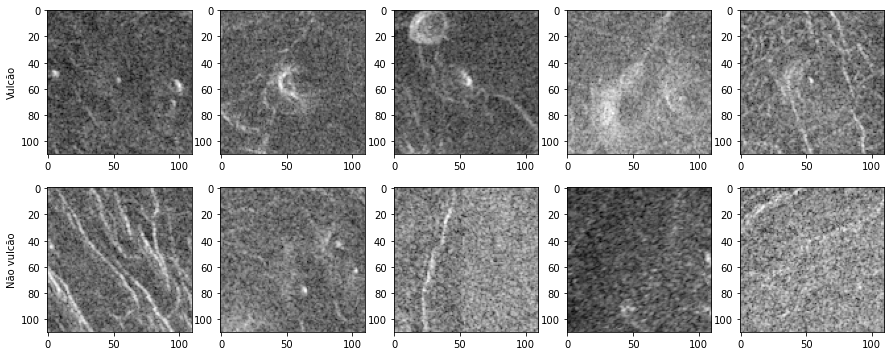

In [89]:
amostra_vulcao = train_data[train_labels['Volcano?'] == 1].sample(5)
amostra_nao_vulcao = train_data[train_labels['Volcano?'] == 0].sample(5)

plt.subplots(figsize = (15,6))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.imshow(amostra_vulcao.iloc[i,:].values.reshape((110, 110)), cmap = 'gray')
    if i == 0: plt.ylabel('Vulcão')
for i in range(5):
    plt.subplot(2,5,i+6)
    if i == 0: plt.ylabel('Não vulcão')
    plt.imshow(amostra_nao_vulcao.iloc[i,:].values.reshape((110,110)), cmap = 'gray')

## Pré-processamento

### Separando em conjunto de treino, validação e teste

In [211]:
Xtrain_raw = train_data/255
ytrain_raw = train_labels['Volcano?']
Xtest_raw = test_data/255
ytest_raw = test_labels['Volcano?']

In [212]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(Xtrain_raw, ytrain_raw, test_size = 0.2, random_state = 3)
x_test, y_test = Xtest_raw, ytest_raw

## Modelando

### Regressão logística simples

In [213]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve 
from sklearn.model_selection import cross_val_predict
from time import time

In [214]:
modelLR = LogisticRegression()

In [215]:
start = time()
modelLR.fit(x_train, y_train)
end = time()
print('training time: {} mins.'.format((end-start)/60))

training time: 0.21958914995193482 mins.


C:\Users\malta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [216]:
from sklearn.metrics import classification_report
predVali = modelLR.predict(x_valid)
predTest = modelLR.predict(x_test)
print('validation report:','\n',classification_report(y_valid, predVali))
print('testing report:', '\n', classification_report(y_test, predTest))

validation report: 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      1199
           1       0.86      0.64      0.73       201

    accuracy                           0.93      1400
   macro avg       0.90      0.81      0.85      1400
weighted avg       0.93      0.93      0.93      1400

testing report: 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      2300
           1       0.84      0.65      0.73       434

    accuracy                           0.93      2734
   macro avg       0.89      0.81      0.84      2734
weighted avg       0.92      0.93      0.92      2734



In [217]:
accuracy_score(y_valid, predVali)

0.9328571428571428

In [24]:
some_digit = train_data[train_labels['Volcano?'] == 1]
#some_digit_image = some_digit.iloc[i,:].values.reshape((110, 110))

y_scores = modelLR.decision_function(some_digit)
threshold = 8000
y_some_digit_pred = (y_scores > threshold)

In [25]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(modelLR, x_train, y_train, cv=3, method = 'decision_function')
(y_train_pred == (y_scores > 0).all())

array([False, False, False, ..., False, False, False])

In [26]:
precisions, recalls, thresholds = precision_recall_curve(y_train,y_train_pred)

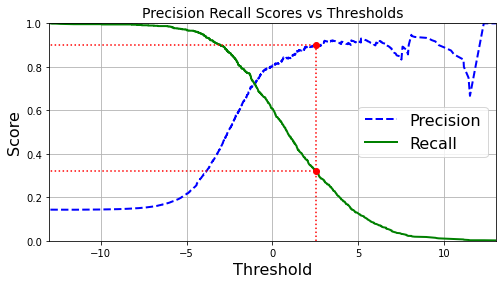

In [27]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.ylabel(ylabel = 'Score', fontsize = 16)
    plt.title(label = 'Precision Recall Scores vs Thresholds', size = 14)
    plt.grid(True)                              # Not shown
    plt.axis([-13, 13, 0, 1])             # Not shown


recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
#save_fig("precision_recall_vs_threshold_plot")   

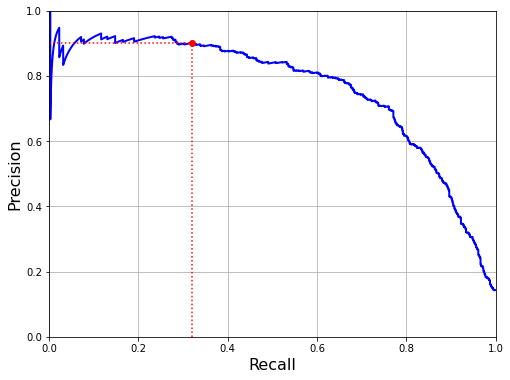

In [28]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
#save_fig("precision_vs_recall_plot")
plt.show()

### 2 hidden layers, saida sigmoid

In [133]:
def reset_weights(model):
    import keras.backend as K
    session = K.get_session()
    for layer in model.layers: 
        if hasattr(layer, 'kernel.initializer'): 
            layer.kernel.initializer.run(session=session)
        if hasattr(layer, 'bias.initializer'):
            layer.bias.initializer.run(session=session)   

In [200]:
#Alterando o shape dos dados de treino e teste para o formato do CNN
img_rows, img_cols = 110, 110

X = Xtrain_raw.values.reshape((-1, img_rows, img_cols, 1))
y = ytrain_raw.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_test = Xtest_raw.values.reshape((-1, img_rows, img_cols, 1))
y_test = ytest_raw.values

In [102]:
#build up the model with 3 convolution layers, each followed by a maxpooling and a drop out

# kernel_initializer can be tuned for the first conv2D layer
init = keras.initializers.RandomNormal(mean=0, stddev=0.1 )
modelCNN1 = Sequential()
modelCNN1.add(Conv2D(6, kernel_size = (3,3),kernel_initializer=init, activation = 'relu', input_shape = (img_rows, img_cols, 1)))
modelCNN1.add(MaxPool2D(pool_size=(2,2), strides=2))
modelCNN1.add(Dropout(0.5))
modelCNN1.add(Conv2D(12, kernel_size = (3,3), activation = 'relu'))
modelCNN1.add(MaxPool2D(pool_size=(2,2), strides=2))
modelCNN1.add(Dropout(0.5))
modelCNN1.add(Conv2D(24, kernel_size = (3,3), activation = 'relu'))
modelCNN1.add(MaxPool2D(pool_size=(2,2), strides=2))
modelCNN1.add(Dropout(0.5))
modelCNN1.add(Flatten())
modelCNN1.add(Dense(1, activation = 'sigmoid'))

modelCNN1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 108, 108, 6)       60        
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 6)        0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 54, 54, 6)         0         
                                                                 
 conv2d_10 (Conv2D)          (None, 52, 52, 12)        660       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 26, 26, 12)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 26, 26, 12)       

In [103]:
# the line bolow can be used for tuning the adam optimizer, e.g. different initial learning rate
# adam = keras.optimizers.Adam(lr=1e-6, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
modelCNN1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# the callBack parameter can be added to model.fit as 'callbacks = [callBack]' for early termination
from keras.callbacks import EarlyStopping
callBack = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=0, mode='auto')


epochs = 100
batch_size = 64

reset_weights(modelCNN1)
history = modelCNN1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                        validation_data=(X_valid, y_valid),
                        callbacks=[callBack]
                       )

modelCNN1.save("C:/Users/malta/Desktop/Pós Graduação/Redes neurais/Projeto 2/modelCNN1.h5")
print("Saved model to disk")

Epoch 1/100
88/88 [==============================] - 53s 268ms/step - loss: 0.4330 - accuracy: 0.8546 - val_loss: 0.5715 - val_accuracy: 0.8614
Epoch 2/100
88/88 [==============================] - 19s 214ms/step - loss: 0.4182 - accuracy: 0.8561 - val_loss: 0.5616 - val_accuracy: 0.8614
Epoch 3/100
88/88 [==============================] - 19s 214ms/step - loss: 0.4107 - accuracy: 0.8561 - val_loss: 0.5321 - val_accuracy: 0.8614
Epoch 4/100
88/88 [==============================] - 19s 211ms/step - loss: 0.4062 - accuracy: 0.8561 - val_loss: 0.5126 - val_accuracy: 0.8614
Epoch 5/100
88/88 [==============================] - 19s 212ms/step - loss: 0.4070 - accuracy: 0.8561 - val_loss: 0.5029 - val_accuracy: 0.8614
Epoch 6/100
88/88 [==============================] - 19s 211ms/step - loss: 0.4026 - accuracy: 0.8561 - val_loss: 0.5090 - val_accuracy: 0.8614
Epoch 7/100
88/88 [==============================] - 19s 210ms/step - loss: 0.3986 - accuracy: 0.8561 - val_loss: 0.5054 - val_accuracy:

In [104]:
predVali_cnn = (modelCNN1.predict(X_valid) > 0.5).astype("int32")
predTest_cnn = (modelCNN1.predict(X_test) > 0.5).astype("int32")
print('validation report:','\n',classification_report(y_valid, predVali_cnn))
print('testing report:', '\n', classification_report(y_test, predTest_cnn))
print('validation accuracy:', accuracy_score(y_valid, predVali_cnn))
print('test accuracy:', accuracy_score(y_test, predTest_cnn))


validation report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1206
           1       0.96      0.70      0.81       194

    accuracy                           0.95      1400
   macro avg       0.96      0.85      0.89      1400
weighted avg       0.95      0.95      0.95      1400

testing report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      2300
           1       0.95      0.72      0.82       434

    accuracy                           0.95      2734
   macro avg       0.95      0.86      0.90      2734
weighted avg       0.95      0.95      0.95      2734

validation accuracy: 0.9542857142857143
test accuracy: 0.9495245062179956


In [168]:
def report(model):
    predVali = (model.predict(X_valid) > 0.5).astype("int32")
    predTest = (model.predict(X_test) > 0.5).astype("int32")
    print('validation report:','\n',classification_report(y_valid, predVali))
    print('validation accuracy:', accuracy_score(y_valid, predVali))
    print('testing report:', '\n', classification_report(y_test, predTest))
    print('test accuracy:', accuracy_score(y_test, predTest))

def plotLearningCurves(history):
    fig, ax = plt.subplots(1,2, figsize = (14,6))
    ax[0].plot(history.epoch, history.history['loss'], color='b', label="Training loss")
    ax[0].plot(history.epoch, history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
    ax[0].legend(loc='best', shadow=True)
    ax[0].set_title('loss vs epoch')

    ax[1].plot(history.epoch, history.history['accuracy'], color='b', label="Training accuracy")
    ax[1].plot(history.epoch, history.history['val_accuracy'], color='r',label="Validation accuracy")
    ax[1].legend(loc='best', shadow=True)
    ax[1].set_title('accuracy vs epoch')

plotLearningCurves(history)    
#report(modelCNN1)

### Tentando rebalancear as classes

The values and graphs show us validation_loss is same as training_loss. If valitadion_loss too higher than training_loss this means that there is an overfitting problem. 

Notice our label is not balanced, let's give the class different weights to account for the imbalance

In [106]:
#Model cloning is similar to calling a model on new inputs,
#except that it creates new layers (and thus new weights)
#instead of sharing the weights of the existing layers.

modelCNN2 = keras.models.clone_model(modelCNN1)
modelCNN2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
reset_weights(modelCNN2)

# the block below computes the class weights from the training set
from collections import Counter
counter = Counter(y_train) 
max_val = float(max(counter.values()))       
class_weight = {class_id : max_val/num_images for class_id, num_images in counter.items()}

epochs = 80
batch_size = 64

history2 = modelCNN2.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                         validation_data=(X_valid, y_valid),
                         #callbacks=[callBack],
                         class_weight = class_weight
                        )

modelCNN2.save("C:/Users/malta/Desktop/Pós Graduação/Redes neurais/Projeto 2/modelCNN2.h5")
print("Saved model to disk")

Epoch 1/80
88/88 [==============================] - 20s 215ms/step - loss: 1.1930 - accuracy: 0.5073 - val_loss: 0.6892 - val_accuracy: 0.8571
Epoch 2/80
88/88 [==============================] - 19s 212ms/step - loss: 1.1832 - accuracy: 0.5893 - val_loss: 0.6961 - val_accuracy: 0.1693
Epoch 3/80
88/88 [==============================] - 18s 209ms/step - loss: 1.1648 - accuracy: 0.5746 - val_loss: 0.6845 - val_accuracy: 0.1729
Epoch 4/80
88/88 [==============================] - 18s 209ms/step - loss: 1.1277 - accuracy: 0.6720 - val_loss: 0.6758 - val_accuracy: 0.4414
Epoch 5/80
88/88 [==============================] - 19s 216ms/step - loss: 0.9999 - accuracy: 0.6718 - val_loss: 0.6176 - val_accuracy: 0.6779
Epoch 6/80
88/88 [==============================] - 19s 211ms/step - loss: 0.8787 - accuracy: 0.7889 - val_loss: 0.5674 - val_accuracy: 0.8579
Epoch 7/80
88/88 [==============================] - 18s 207ms/step - loss: 0.8073 - accuracy: 0.8382 - val_loss: 0.5256 - val_accuracy: 0.8686

Epoch 58/80
88/88 [==============================] - 18s 207ms/step - loss: 0.4877 - accuracy: 0.9134 - val_loss: 0.3647 - val_accuracy: 0.9279
Epoch 59/80
88/88 [==============================] - 18s 205ms/step - loss: 0.4657 - accuracy: 0.9220 - val_loss: 0.3577 - val_accuracy: 0.9300
Epoch 60/80
88/88 [==============================] - 18s 207ms/step - loss: 0.4766 - accuracy: 0.9120 - val_loss: 0.3422 - val_accuracy: 0.9436
Epoch 61/80
88/88 [==============================] - 18s 205ms/step - loss: 0.4708 - accuracy: 0.9209 - val_loss: 0.3608 - val_accuracy: 0.9300
Epoch 62/80
88/88 [==============================] - 18s 205ms/step - loss: 0.4654 - accuracy: 0.9204 - val_loss: 0.3400 - val_accuracy: 0.9393
Epoch 63/80
88/88 [==============================] - 18s 206ms/step - loss: 0.4676 - accuracy: 0.9232 - val_loss: 0.3787 - val_accuracy: 0.9257
Epoch 64/80
88/88 [==============================] - 18s 206ms/step - loss: 0.4513 - accuracy: 0.9234 - val_loss: 0.3499 - val_accuracy:

In [110]:
predVali_cnn2 = (modelCNN2.predict(X_valid) > 0.5).astype("int32")
predTest_cnn2 = (modelCNN2.predict(X_test) > 0.5).astype("int32")
print('validation report:','\n',classification_report(y_valid, predVali_cnn2))
print('testing report:', '\n', classification_report(y_test, predTest_cnn2))
print('validation accuracy:', accuracy_score(y_valid, predVali_cnn2))
print('test accuracy:', accuracy_score(y_test, predTest_cnn2))

validation report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1206
           1       0.81      0.80      0.80       194

    accuracy                           0.95      1400
   macro avg       0.89      0.88      0.89      1400
weighted avg       0.95      0.95      0.95      1400

testing report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2300
           1       0.83      0.82      0.83       434

    accuracy                           0.95      2734
   macro avg       0.90      0.90      0.90      2734
weighted avg       0.95      0.95      0.95      2734

validation accuracy: 0.9457142857142857
test accuracy: 0.9455010972933431


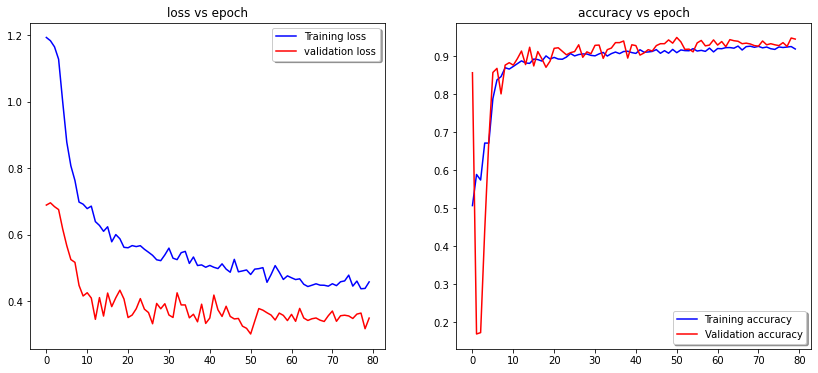

In [108]:
plotLearningCurves(history2) 

Although the accuracy did not increase much, the recall rate for volcano increased a lot, which I consider a great improvement compared to the previous two models. Looking at the curve it seems like there is still a small room to improve modelCNN2.

### Usando data augmentation

Let's try to use image augumentation to increase the training data.

In [111]:
from keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = False, # Randomly zoom image 
        width_shift_range= False,  # randomly shift images horizontally (fraction of total width)
        height_shift_range= False,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images


datagen.fit(X_train)
generator = datagen.flow(X_train, y_train, batch_size= batch_size)

In [112]:
modelCNN3 = keras.models.clone_model(modelCNN1)
modelCNN3.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

epochs = 60
reset_weights(modelCNN3)
history3 = modelCNN3.fit_generator(generator,epochs = epochs, validation_data = (X_valid,y_valid),
                                   class_weight = class_weight,
                                   #callbacks=[callBack]
                                  )

modelCNN3.save("C:/Users/malta/Desktop/Pós Graduação/Redes neurais/Projeto 2/modelCNN3.h5")
print("Saved model to disk")

Epoch 1/60
88/88 [==============================] - 22s 236ms/step - loss: 1.1948 - accuracy: 0.5254 - val_loss: 0.6917 - val_accuracy: 0.8614
Epoch 2/60
88/88 [==============================] - 20s 231ms/step - loss: 1.1852 - accuracy: 0.6209 - val_loss: 0.6945 - val_accuracy: 0.1393
Epoch 3/60
88/88 [==============================] - 21s 232ms/step - loss: 1.1803 - accuracy: 0.5611 - val_loss: 0.6956 - val_accuracy: 0.1721
Epoch 4/60
88/88 [==============================] - 21s 234ms/step - loss: 1.1668 - accuracy: 0.4821 - val_loss: 0.6967 - val_accuracy: 0.1386
Epoch 5/60
88/88 [==============================] - 21s 233ms/step - loss: 1.0634 - accuracy: 0.6607 - val_loss: 0.6824 - val_accuracy: 0.5186
Epoch 6/60
88/88 [==============================] - 20s 231ms/step - loss: 0.9505 - accuracy: 0.7414 - val_loss: 0.4784 - val_accuracy: 0.8621
Epoch 7/60
88/88 [==============================] - 22s 251ms/step - loss: 0.8730 - accuracy: 0.8271 - val_loss: 0.4720 - val_accuracy: 0.8729

Epoch 58/60
88/88 [==============================] - 20s 232ms/step - loss: 0.5563 - accuracy: 0.9107 - val_loss: 0.3387 - val_accuracy: 0.9214
Epoch 59/60
88/88 [==============================] - 20s 229ms/step - loss: 0.5443 - accuracy: 0.9145 - val_loss: 0.3171 - val_accuracy: 0.9329
Epoch 60/60
88/88 [==============================] - 20s 230ms/step - loss: 0.5579 - accuracy: 0.9107 - val_loss: 0.3326 - val_accuracy: 0.9229
Saved model to disk


In [113]:
predVali_cnn3 = (modelCNN3.predict(X_valid) > 0.5).astype("int32")
predTest_cnn3 = (modelCNN3.predict(X_test) > 0.5).astype("int32")
print('validation report:','\n',classification_report(y_valid, predVali_cnn3))
print('testing report:', '\n', classification_report(y_test, predTest_cnn3))
print('validation accuracy:', accuracy_score(y_valid, predVali_cnn3))
print('test accuracy:', accuracy_score(y_test, predTest_cnn3))

validation report: 
               precision    recall  f1-score   support

           0       0.97      0.94      0.95      1206
           1       0.69      0.82      0.75       194

    accuracy                           0.92      1400
   macro avg       0.83      0.88      0.85      1400
weighted avg       0.93      0.92      0.93      1400

testing report: 
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      2300
           1       0.74      0.87      0.80       434

    accuracy                           0.93      2734
   macro avg       0.86      0.91      0.88      2734
weighted avg       0.94      0.93      0.93      2734

validation accuracy: 0.9228571428571428
test accuracy: 0.9316020482809071


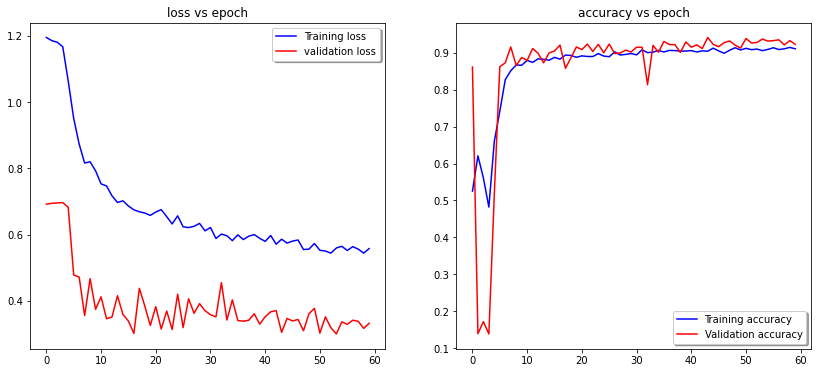

In [114]:
plotLearningCurves(history3) 

### 3 hidden layers, saida sigmoid

CNN model 4, adding model complexity

In [136]:
init = keras.initializers.RandomNormal(mean=0, stddev=0.1 )
modelCNN4 = Sequential()
modelCNN4.add(Conv2D(32, kernel_size = (3,3),kernel_initializer=init, activation = 'relu', input_shape = (img_rows, img_cols, 1)))
modelCNN4.add(MaxPool2D(pool_size=(2,2), strides=2))
modelCNN4.add(Dropout(0.5))
modelCNN4.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
modelCNN4.add(MaxPool2D(pool_size=(2,2), strides=2))
modelCNN4.add(Dropout(0.5))
modelCNN4.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
modelCNN4.add(MaxPool2D(pool_size=(2,2), strides=2))
modelCNN4.add(Dropout(0.5))
modelCNN4.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
modelCNN4.add(MaxPool2D(pool_size=(2,2), strides=2))
modelCNN4.add(Dropout(0.5))
modelCNN4.add(Flatten())
modelCNN4.add(Dense(1, activation = 'sigmoid'))

modelCNN4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 108, 108, 32)      320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 54, 54, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 26, 26, 64)       0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 26, 26, 64)       

In [137]:
modelCNN4.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

reset_weights(modelCNN4)
epochs = 80
batch_size = 64
history4 = modelCNN4.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                         validation_data=(X_valid, y_valid),
                         callbacks=[callBack],
                         class_weight = class_weight
                        )

modelCNN4.save("C:/Users/malta/Desktop/Pós Graduação/Redes neurais/Projeto 2/modelCNN4.h5")
print("Saved model to disk")

Epoch 1/80
88/88 [==============================] - 82s 898ms/step - loss: 1.2039 - accuracy: 0.4873 - val_loss: 0.6913 - val_accuracy: 0.8614
Epoch 2/80
88/88 [==============================] - 77s 876ms/step - loss: 1.1889 - accuracy: 0.5432 - val_loss: 0.6918 - val_accuracy: 0.8600
Epoch 3/80
88/88 [==============================] - 74s 838ms/step - loss: 1.1869 - accuracy: 0.4930 - val_loss: 0.6903 - val_accuracy: 0.8614
Epoch 4/80
88/88 [==============================] - 73s 833ms/step - loss: 1.1826 - accuracy: 0.6916 - val_loss: 0.6843 - val_accuracy: 0.1686
Epoch 5/80
88/88 [==============================] - 73s 835ms/step - loss: 1.1581 - accuracy: 0.5323 - val_loss: 0.6718 - val_accuracy: 0.5286
Epoch 6/80
88/88 [==============================] - 74s 836ms/step - loss: 1.0483 - accuracy: 0.6529 - val_loss: 0.6285 - val_accuracy: 0.6364
Epoch 7/80
88/88 [==============================] - 73s 834ms/step - loss: 0.8850 - accuracy: 0.7629 - val_loss: 0.5696 - val_accuracy: 0.8507

Epoch 58/80
88/88 [==============================] - 73s 831ms/step - loss: 0.2730 - accuracy: 0.9536 - val_loss: 0.1458 - val_accuracy: 0.9564
Epoch 59/80
88/88 [==============================] - 74s 840ms/step - loss: 0.2844 - accuracy: 0.9513 - val_loss: 0.1689 - val_accuracy: 0.9529
Epoch 60/80
88/88 [==============================] - 74s 837ms/step - loss: 0.2790 - accuracy: 0.9464 - val_loss: 0.1537 - val_accuracy: 0.9586
Epoch 61/80
88/88 [==============================] - 75s 855ms/step - loss: 0.2614 - accuracy: 0.9500 - val_loss: 0.1478 - val_accuracy: 0.9543
Epoch 62/80
88/88 [==============================] - 74s 840ms/step - loss: 0.2715 - accuracy: 0.9507 - val_loss: 0.1927 - val_accuracy: 0.9493
Epoch 63/80
88/88 [==============================] - 77s 870ms/step - loss: 0.2630 - accuracy: 0.9538 - val_loss: 0.2129 - val_accuracy: 0.9507
Epoch 64/80
88/88 [==============================] - 82s 935ms/step - loss: 0.2681 - accuracy: 0.9495 - val_loss: 0.1578 - val_accuracy:

In [138]:
predVali_cnn4 = (modelCNN4.predict(X_valid) > 0.5).astype("int32")
predTest_cnn4 = (modelCNN4.predict(X_test) > 0.5).astype("int32")
print('validation report:','\n',classification_report(y_valid, predVali_cnn4))
print('testing report:', '\n', classification_report(y_test, predTest_cnn4))
print('validation accuracy:', accuracy_score(y_valid, predVali_cnn4))
print('test accuracy:', accuracy_score(y_test, predTest_cnn4))

validation report: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      1206
           1       0.81      0.88      0.84       194

    accuracy                           0.95      1400
   macro avg       0.89      0.92      0.91      1400
weighted avg       0.96      0.95      0.96      1400

testing report: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      2300
           1       0.85      0.90      0.87       434

    accuracy                           0.96      2734
   macro avg       0.91      0.94      0.92      2734
weighted avg       0.96      0.96      0.96      2734

validation accuracy: 0.9542857142857143
test accuracy: 0.9586686174103877


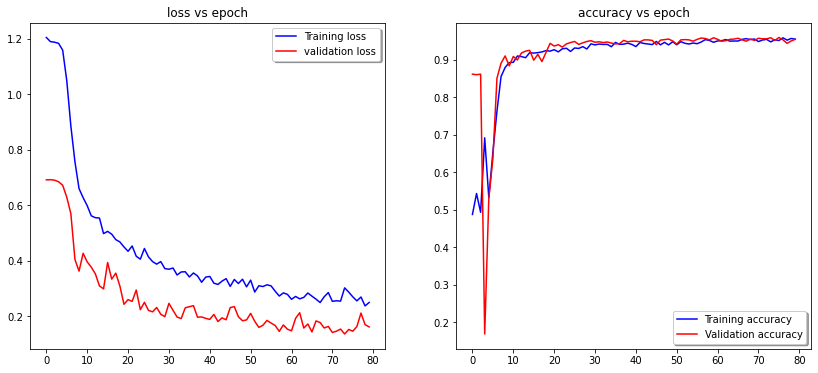

In [139]:
plotLearningCurves(history4) 

### Comparando os modelos

In [151]:
scoreA = modelCNN1.evaluate(X_test, y_test)
scoreB = modelCNN2.evaluate(X_test, y_test)
scoreC = modelCNN3.evaluate(X_test, y_test)
scoreD = modelCNN4.evaluate(X_test, y_test)

86/86 [==============================] - 8s 93ms/step - loss: 0.1598 - accuracy: 0.9587 1s - los


In [155]:
import plotly.graph_objs as go
import plotly.offline as iplot
import plotly.io as pio

In [164]:
x = ['Model A', 'Model B', 'Model C', 'Model D']
y = [scoreA[0], scoreB[0], scoreC[0], scoreD[0]]
y2 = [scoreA[1], scoreB[1], scoreC[1],scoreD[1]]

trace1 = go.Bar(
    x=x,
    y=y,
    textposition = 'auto',
    name = 'Test Loss',
    marker=dict(
        color='LightSeaGreen',
        line=dict(
            color='LightSeaGreen',
            width=1.5),
        ),
    opacity=0.7
)

trace2 = go.Bar(
    x=x,
    y=y2,
    textposition = 'auto',
    name = 'Test Acc',
    marker=dict(
        color='RoyalBlue',
        line=dict(
            color='RoyalBlue',
            width=1.5),
        ),
    opacity=0.7
)

data = [trace1,trace2]

layout = go.Layout(
    title='Models Performance Graph',
)

fig = go.Figure(data=data, layout=layout)

pio.show(fig)

# Autoencoder para classificação

In [66]:
trainNoise = np.random.normal(loc=0.5, scale=0.5, size=X_train.shape)
testNoise = np.random.normal(loc=0.5, scale=0.5, size=X_test.shape)
trainXNoisy = np.clip(X_train + trainNoise, 0, 1)
testXNoisy = np.clip(X_test + testNoise, 0, 1)

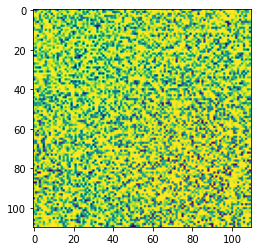

In [81]:
plt.imshow(testXNoisy[110])

In [79]:
range(10)

range(0, 10)

In [90]:
np.random.randint(len(testXNoisy), size=10)

array([ 826,  420, 1240, 1374,  956, 2378, 1091,  474, 2369, 2642])

<Figure size 432x288 with 0 Axes>

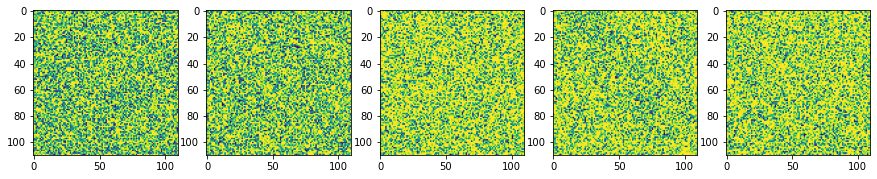

In [112]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(nrows=1, ncols=5,figsize=(15,15)) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(testXNoisy[826])
axarr[1].imshow(testXNoisy[420])
axarr[2].imshow(testXNoisy[1240])
axarr[3].imshow(testXNoisy[1374])
axarr[4].imshow(testXNoisy[956])
#axarr[5].imshow(testXNoisy[2378])
#axarr[6].imshow(testXNoisy[1091])
#axarr[7].imshow(testXNoisy[474])
#axarr[8].imshow(testXNoisy[2369])
#axarr[9].imshow(testXNoisy[2642])

<Figure size 432x288 with 0 Axes>

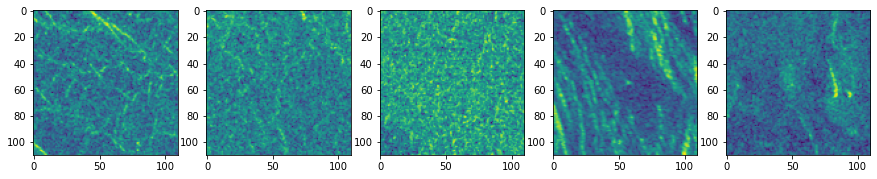

In [113]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(nrows=1, ncols=5,figsize=(15,15)) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(X_test[826])
axarr[1].imshow(X_test[420])
axarr[2].imshow(X_test[1240])
axarr[3].imshow(X_test[1374])
axarr[4].imshow(X_test[956])

In [137]:
encoder1 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(32, activation='relu'),      # encoder
  tf.keras.layers.Dense(110*110, activation='sigmoid') # decoder
])

In [139]:
# compile the model
encoder1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss='binary_crossentropy')

In [140]:
# fit the model on training data
encoder1.fit(x_train, x_train, epochs=30, batch_size= 250, validation_split = 1/6)

Epoch 1/30
19/19 [==============================] - 66s 2s/step - loss: 0.6891 - val_loss: 0.6800
Epoch 2/30
19/19 [==============================] - 2s 114ms/step - loss: 0.6785 - val_loss: 0.6770
Epoch 3/30
19/19 [==============================] - 2s 129ms/step - loss: 0.6775 - val_loss: 0.6761
Epoch 4/30
19/19 [==============================] - 2s 116ms/step - loss: 0.6772 - val_loss: 0.6763
Epoch 5/30
19/19 [==============================] - 2s 119ms/step - loss: 0.6764 - val_loss: 0.6754
Epoch 6/30
19/19 [==============================] - 2s 129ms/step - loss: 0.6756 - val_loss: 0.6746
Epoch 7/30
19/19 [==============================] - 2s 116ms/step - loss: 0.6751 - val_loss: 0.6742
Epoch 8/30
19/19 [==============================] - 2s 114ms/step - loss: 0.6747 - val_loss: 0.6736
Epoch 9/30
19/19 [==============================] - 2s 114ms/step - loss: 0.6749 - val_loss: 0.6736
Epoch 10/30
19/19 [==============================] - 2s 119ms/step - loss: 0.6736 - val_loss: 0.6722
E

Sumário do ajuste e imagens preditas

In [141]:
# get a summary information about the model 
encoder1.summary()

# reconstruct the test images
decoded_images = encoder1.predict(x_test)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                387232    
                                                                 
 dense_19 (Dense)            (None, 12100)             399300    
                                                                 
Total params: 786,532
Trainable params: 786,532
Non-trainable params: 0
_________________________________________________________________


Visualizando as imagens reconstruídas pelo autoencoder

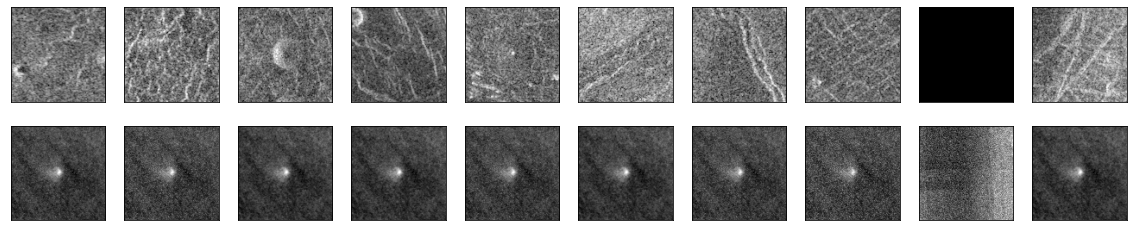

In [148]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(110,110))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images[i].reshape(110,110))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [150]:

# We will need to access the contents of the intermediate layer.
# That requires defining a new keras model that gets the output of the encoder
# layer

# First, we will need the names of each layer
print(encoder1.layers[0].name)
print(encoder1.layers[1].name)

# To be more meaningful, we will change those names as follows
encoder1.layers[0]._name = "layer_1"
encoder1.layers[1]._name = "layer_2"

print(encoder1.layers[0].name)
print(encoder1.layers[1].name)

# now we create a new keras model based on model1 defined (and trained) previously
encoder = tf.keras.models.Model( inputs = encoder1.input,
                                 outputs = encoder1.get_layer("layer_1").output )
encoded_images = encoder.predict(x_test)


dense_18
dense_19
layer_1
layer_2


Visualizando as imagens codificadas

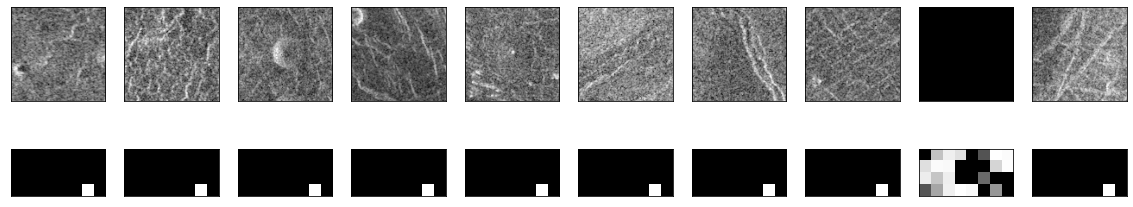

In [154]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(110,110))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_images[i].reshape(4, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Deep Convolutional Autoencoders para redução de ruído

In [5]:
from sklearn.model_selection import train_test_split

In [72]:
x_train_mat = train_data/255.0
y_train_mat = train_labels['Volcano?']
x_test_mat = test_data/255.0
y_test_mat = test_labels['Volcano?']

In [73]:
x_train_mat = x_train_mat.values
x_test_mat = x_test_mat.values

In [74]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train_mat, y_train_mat, test_size = 0.2, random_state = 3)
x_test, y_test = x_test_mat, y_test_mat

In [75]:
x_test_mat.shape

(2734, 12100)

In [76]:
print( "x_train_mat.shape")
print( x_train_mat.shape )
x_train_vec = x_train_mat.reshape( (-1, 110,110) )
print( "x_train_vec.shape")
print( x_train_vec.shape )

print( "x_test_mat.shape")
print( x_test_mat.shape )
x_test_vec = x_test_mat.reshape( (-1, 110,110) )
print( "x_test_vec.shape")
print( x_test_vec.shape )

print( "y_train.shape")
print( y_train.shape )

print( "y_test.shape")
print( y_test.shape )

x_train_mat.shape
(7000, 12100)
x_train_vec.shape
(7000, 110, 110)
x_test_mat.shape
(2734, 12100)
x_test_vec.shape
(2734, 110, 110)
y_train.shape
(5600,)
y_test.shape
(2734,)


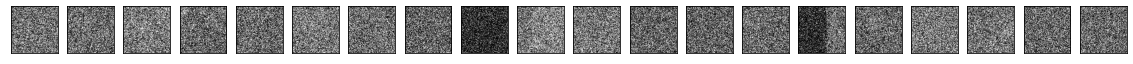

In [77]:
# adding noise to training data
x_train_noisy_mat = x_train_mat + np.random.normal(loc=0.0, scale=0.5, size=x_train_mat.shape)
x_train_noisy_mat = np.clip(x_train_noisy_mat, 0., 1.)
x_train_noisy_mat = x_train_noisy_mat.reshape( (-1, 110, 110, 1) )

# adding noise to the test data
x_test_noisy_mat = x_test_mat + np.random.normal(loc=0.0, scale=0.5, size=x_test_mat.shape) 
x_test_noisy_mat = np.clip(x_test_noisy_mat, 0., 1.)
x_test_noisy_mat = x_test_noisy_mat.reshape( (-1, 110, 110, 1) )

n = 20  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy_mat[i].reshape(110,110))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

Definindo o Autoencoder para redução de ruído...

In [78]:
ruido = tf.keras.models.Sequential([
  
  tf.keras.layers.Conv2D(30, (3,3), padding = "same", activation='relu'),     
  tf.keras.layers.MaxPooling2D( (2,2), strides = 2),

  tf.keras.layers.Conv2D(20, (3,3), padding = "same", activation='relu'),     
  tf.keras.layers.MaxPooling2D( (2,2), strides = 2),   # encoder

  tf.keras.layers.Conv2D(20, (3,3), padding = "same", activation='relu'),     
  tf.keras.layers.UpSampling2D( (2,2) ),

  tf.keras.layers.Conv2D(30, (3,3), padding = "same", activation='relu'),     
  tf.keras.layers.UpSampling2D( (2,2) ),

  tf.keras.layers.Conv2D(1, (1,1), padding = "same", activation='sigmoid') # decoder
])


In [80]:
x_train = tf.image.resize(x_train_mat, [128,128])
x_test = tf.image.resize(x_test_mat, [128,128])

ValueError: 'images' must have either 3 or 4 dimensions.

In [79]:
# compile the model
ruido.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
              loss='binary_crossentropy')

In [87]:
x_desespero =  tf.image.resize( x_train_mat,[110,110,1])

ValueError: 'images' must have either 3 or 4 dimensions.

In [23]:
x_train_noisy_mat.shape

(7000, 110, 110, 1)

In [55]:
x_train_mat.shape

(7000, 12100)

In [48]:
x_desespero.shape

(7000, 110, 110)

In [34]:
x_train_noisy_mat.size

84700000

In [42]:
type(x_test_noisy_mat)

numpy.ndarray

In [43]:
type(x_train_mat.reshape( (-1, 110,110) ))

numpy.ndarray

In [36]:
x_test_noisy_mat.reshape( (-1, 110, 110, 1) ).shape

(2734, 110, 110, 1)

In [38]:
x_train_mat.reshape( (-1, 110,110) ).shape

(7000, 110, 110)

In [46]:
ruido.fit(x_train_noisy_mat, x_desespero, epochs=15, batch_size= 100,validation_split = 1/6)

Epoch 1/15


TypeError: 'NoneType' object is not callable

Sumário do modelo ajustado e cálculo das imagens reconstruídas

In [ ]:

# get a summary information about the model 
ruido.summary()

# reconstruct the test images
decoded_images = ruido.predict(x_test_noisy_mat)

In [ ]:
n = 20  # How many digits we will display
plt.figure(figsize=(60, 4))
for i in range(n):
    
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_mat[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy_mat[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Autoencoder que funciona

In [23]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.models import Model

In [4]:
Xtrain_raw = train_data.astype('float32')/255
ytrain_raw = train_labels['Volcano?']
Xtest_raw = test_data.astype('float32')/255
ytest_raw = test_labels['Volcano?']

In [19]:
x_train = np.reshape(Xtrain_raw.values, newshape= (len(Xtrain_raw), 110, 110, 1))
x_test = np.reshape(Xtest_raw.values, newshape= (len(Xtest_raw), 110, 110, 1))

In [20]:
print(x_train.shape)
print(x_test.shape)

(7000, 110, 110, 1)
(2734, 110, 110, 1)


In [21]:
x_train = tf.image.resize(x_train, [128,128]) #Por que o autoencoder não funciona com 110 x 110?
x_test = tf.image.resize(x_test, [128,128])

In [22]:
print(x_train.shape)
print(x_test.shape)

(7000, 128, 128, 1)
(2734, 128, 128, 1)


In [24]:
input_layer = Input(shape=(128, 128, 1), name="INPUT")
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

code_layer = MaxPooling2D((2, 2), name="CODE")(x)

x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(code_layer)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
output_layer = Conv2D(1, (3, 3), padding='same', name="OUTPUT")(x)

In [27]:
volc_AE = Model(input_layer, output_layer)
volc_AE.compile(optimizer='adam', loss='binary_crossentropy')
volc_AE.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT (InputLayer)          [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 8)         584 

In [30]:
volc_AE.fit(x_train, x_train,
                epochs=15,
                batch_size=32,
                shuffle=True,
                validation_data=(x_test, x_test))

volc_AE.save("C:/Users/malta/Desktop/Pós Graduação/Redes neurais/Projeto 2/volc_AE.h5")


Epoch 1/15
219/219 [==============================] - 106s 483ms/step - loss: 0.6538 - val_loss: 0.6480
Epoch 2/15
219/219 [==============================] - 106s 483ms/step - loss: 0.6495 - val_loss: 0.6469
Epoch 3/15
219/219 [==============================] - 106s 486ms/step - loss: 0.6491 - val_loss: 0.6467
Epoch 4/15
219/219 [==============================] - 106s 483ms/step - loss: 0.6489 - val_loss: 0.6466
Epoch 5/15
219/219 [==============================] - 106s 482ms/step - loss: 0.6489 - val_loss: 0.6466
Epoch 6/15
219/219 [==============================] - 106s 483ms/step - loss: 0.6488 - val_loss: 0.6466
Epoch 7/15
219/219 [==============================] - 106s 485ms/step - loss: 0.6488 - val_loss: 0.6465
Epoch 8/15
219/219 [==============================] - 106s 483ms/step - loss: 0.6487 - val_loss: 0.6464
Epoch 9/15
219/219 [==============================] - 106s 484ms/step - loss: 0.6487 - val_loss: 0.6464
Epoch 10/15
219/219 [==============================] - 107s 487m

In [31]:
get_encoded_volc = Model(inputs=volc_AE.input, outputs=volc_AE.get_layer("CODE").output)

In [32]:
encoded_volc = get_encoded_volc.predict(x_test)
encoded_volc = encoded_volc.reshape((len(x_test), 16*16*8))
encoded_volc.shape

(2734, 2048)

In [33]:
reconstructed_volc = volc_AE.predict(x_test)

In [38]:
from keras.preprocessing import image

In [39]:
def show_cat_data(X, n=10, title=""):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(image.array_to_img(X[i]))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

In [40]:
def show_data(X, n=10, height=28, width=28, title=""):
    plt.figure(figsize=(10, 3))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(X[i].reshape((height,width)))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

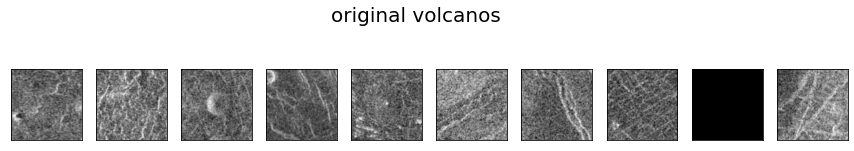

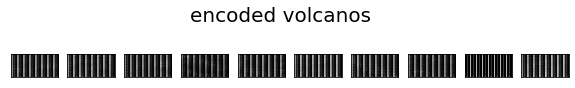

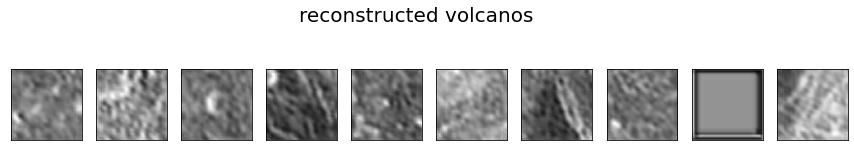

In [42]:
show_cat_data(x_test, title="original volcanos")
show_data(encoded_volc, height=32, width=64, title="encoded volcanos")
show_cat_data(reconstructed_volc, title="reconstructed volcanos")

## Modelando as imagens com autoencoder

### Regressão logística

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve 
from sklearn.model_selection import cross_val_predict

In [ ]:
encodedLR = LogisticRegression()
encodedLR.fit(reconstructed_volc, y_train)

encoded_predVali = encodedLR.predict(x_valid)
encoded_predTest = encodedLR.predict(x_test.numpy)
print('validation report:','\n',classification_report(y_valid, encoded_predVali))
print('testing report:', '\n', classification_report(y_test, encoded_predTest))

In [83]:
type(reconstructed_volc_reshape)

numpy.ndarray

In [84]:
reconstructed_volc_reshape_2 = np.reshape(Xtrain_raw.values, newshape= (-1, 110, 110, 1))

In [85]:
reconstructed_volc_resize.shape

TensorShape([7000, 110, 110, 1])

In [82]:
reconstructed_volc_reshape.shape

(7000, 110, 110, 1)

In [105]:
reconstructed_volc_resize = tf.image.resize(reconstructed_volc, [110,110])

In [106]:
reconstructed_volc_resize.shape

TensorShape([2734, 110, 110, 1])

In [118]:
reconstructed_volc_train = volc_AE.predict(x_train)

In [119]:
reconstructed_volc_train.shape

(7000, 128, 128, 1)

In [120]:
reconstructed_volc.shape


(2734, 128, 128, 1)

In [122]:
type(reconstructed_volc_train)

numpy.ndarray

### CNN com 3 hidden layers

In [96]:
img_rows, img_cols = 128,128

In [142]:
print(reconstructed_volc_train.shape)
print(reconstructed_volc.shape)

(7000, 128, 128, 1)
(2734, 128, 128, 1)


In [146]:
X.shape

(7000, 128, 128, 1)

In [149]:
y.shape

(7000,)

In [152]:
y_test.shape

(2734,)

In [154]:
img_rows, img_cols = 128,128
X =reconstructed_volc_train.reshape((-1, img_rows, img_cols, 1))
y = ytrain_raw.values
X_train, X_valid, y_train, y_valid = train_test_split(reconstructed_volc_train, y, test_size = 0.2, random_state = 42)

X_test = reconstructed_volc.reshape((-1, img_rows, img_cols, 1))
y_test = ytest_raw.values

In [156]:
# kernel_initializer can be tuned for the first conv2D layer
init = keras.initializers.RandomNormal(mean=0, stddev=0.1 )
modelCNN_encoded = Sequential()
modelCNN_encoded.add(Conv2D(6, kernel_size = (3,3),kernel_initializer=init, activation = 'relu', input_shape = (img_rows, img_cols, 1)))
modelCNN_encoded.add(MaxPool2D(pool_size=(2,2), strides=2))
modelCNN_encoded.add(Dropout(0.5))
modelCNN_encoded.add(Conv2D(12, kernel_size = (3,3), activation = 'relu'))
modelCNN_encoded.add(MaxPool2D(pool_size=(2,2), strides=2))
modelCNN_encoded.add(Dropout(0.5))
modelCNN_encoded.add(Conv2D(24, kernel_size = (3,3), activation = 'relu'))
modelCNN_encoded.add(MaxPool2D(pool_size=(2,2), strides=2))
modelCNN_encoded.add(Dropout(0.5))
modelCNN_encoded.add(Flatten())
modelCNN_encoded.add(Dense(1, activation = 'sigmoid'))

modelCNN_encoded.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 6)       60        
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 63, 6)        0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 63, 63, 6)         0         
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 12)        660       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 12)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 30, 30, 12)       

In [157]:
modelCNN_encoded.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [159]:
from keras.callbacks import EarlyStopping
callBack = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=0, mode='auto')

In [163]:
counter = Counter(y_train) 
max_val = float(max(counter.values()))       
class_weight = {class_id : max_val/num_images for class_id, num_images in counter.items()}

In [174]:
reset_weights(modelCNN_encoded)
epochs = 80
batch_size = 64
history_encoded = modelCNN_encoded.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                         validation_data=(X_valid, y_valid),
                         #callbacks=[callBack],
                         class_weight = class_weight
                        )

modelCNN_encoded.save("C:/Users/malta/Desktop/Pós Graduação/Redes neurais/Projeto 2/modelCNN_encoded.h5")
print("Saved model to disk")

Epoch 1/80
88/88 [==============================] - 25s 282ms/step - loss: 0.6281 - accuracy: 0.8732 - val_loss: 0.4187 - val_accuracy: 0.9107
Epoch 2/80
88/88 [==============================] - 27s 306ms/step - loss: 0.6195 - accuracy: 0.8764 - val_loss: 0.4457 - val_accuracy: 0.8893
Epoch 3/80
88/88 [==============================] - 26s 294ms/step - loss: 0.6048 - accuracy: 0.8813 - val_loss: 0.4460 - val_accuracy: 0.8814
Epoch 4/80
88/88 [==============================] - 25s 287ms/step - loss: 0.6018 - accuracy: 0.8813 - val_loss: 0.4316 - val_accuracy: 0.8964
Epoch 5/80
88/88 [==============================] - 25s 280ms/step - loss: 0.6135 - accuracy: 0.8830 - val_loss: 0.4169 - val_accuracy: 0.9171
Epoch 6/80
88/88 [==============================] - 25s 280ms/step - loss: 0.6253 - accuracy: 0.8818 - val_loss: 0.4245 - val_accuracy: 0.9200
Epoch 7/80
88/88 [==============================] - 24s 278ms/step - loss: 0.6116 - accuracy: 0.8788 - val_loss: 0.4450 - val_accuracy: 0.9114

Epoch 58/80
88/88 [==============================] - 24s 274ms/step - loss: 0.4770 - accuracy: 0.9112 - val_loss: 0.3878 - val_accuracy: 0.9314
Epoch 59/80
88/88 [==============================] - 24s 275ms/step - loss: 0.4823 - accuracy: 0.9043 - val_loss: 0.3729 - val_accuracy: 0.9314
Epoch 60/80
88/88 [==============================] - 24s 276ms/step - loss: 0.4819 - accuracy: 0.9095 - val_loss: 0.3919 - val_accuracy: 0.9279
Epoch 61/80
88/88 [==============================] - 24s 278ms/step - loss: 0.4873 - accuracy: 0.9039 - val_loss: 0.3783 - val_accuracy: 0.9364
Epoch 62/80
88/88 [==============================] - 24s 274ms/step - loss: 0.4848 - accuracy: 0.9098 - val_loss: 0.3909 - val_accuracy: 0.9379
Epoch 63/80
88/88 [==============================] - 24s 277ms/step - loss: 0.4809 - accuracy: 0.9114 - val_loss: 0.3744 - val_accuracy: 0.9364
Epoch 64/80
88/88 [==============================] - 25s 280ms/step - loss: 0.4888 - accuracy: 0.9120 - val_loss: 0.3617 - val_accuracy:

In [175]:
predVali_encoded = (modelCNN_encoded.predict(X_valid) > 0.5).astype("int32")
predTest_encoded = (modelCNN_encoded.predict(X_test) > 0.5).astype("int32")
print('validation report:','\n',classification_report(y_valid, predVali_encoded))
print('testing report:', '\n', classification_report(y_test, predTest_encoded))
print('validation accuracy:', accuracy_score(y_valid, predVali_encoded))
print('test accuracy:', accuracy_score(y_test, predTest_encoded))

validation report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1206
           1       0.77      0.75      0.76       194

    accuracy                           0.94      1400
   macro avg       0.87      0.86      0.86      1400
weighted avg       0.93      0.94      0.93      1400

testing report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      2300
           1       0.81      0.75      0.78       434

    accuracy                           0.93      2734
   macro avg       0.88      0.86      0.87      2734
weighted avg       0.93      0.93      0.93      2734

validation accuracy: 0.935
test accuracy: 0.9330651060716898


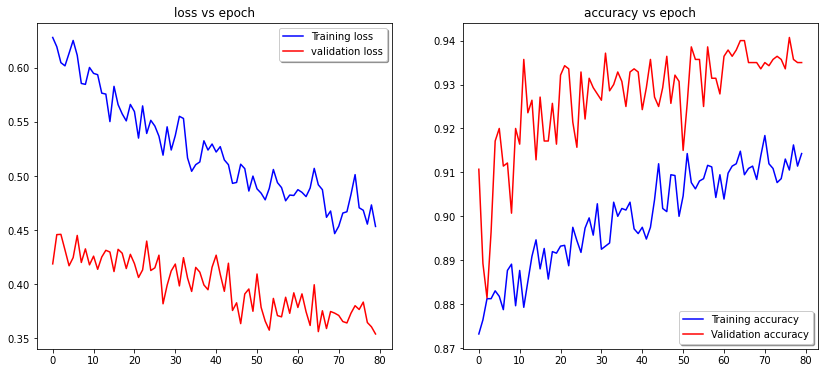

In [176]:
plotLearningCurves(history_encoded) 

In [196]:
import plotly.graph_objs as go
import plotly.offline as iplot
import plotly.io as pio

In [195]:
modelCNN1 = keras.models.load_model("C:/Users/malta/Desktop/Pós Graduação/Redes neurais/Projeto 2/modelCNN1.h5")
modelCNN2 = keras.models.load_model("C:/Users/malta/Desktop/Pós Graduação/Redes neurais/Projeto 2/modelCNN2.h5")
modelCNN3 = keras.models.load_model("C:/Users/malta/Desktop/Pós Graduação/Redes neurais/Projeto 2/modelCNN3.h5")
modelCNN4 = keras.models.load_model("C:/Users/malta/Desktop/Pós Graduação/Redes neurais/Projeto 2/modelCNN4.h5")
modelCNN_encoded = keras.models.load_model("C:/Users/malta/Desktop/Pós Graduação/Redes neurais/Projeto 2/modelCNN_encoded.h5")

In [206]:
scoreA = modelCNN1.evaluate(X_test, y_test)
scoreB = modelCNN2.evaluate(X_test, y_test)
scoreC = modelCNN3.evaluate(X_test, y_test)
scoreD = modelCNN4.evaluate(X_test, y_test)

86/86 [==============================] - 8s 94ms/step - loss: 0.1598 - accuracy: 0.9587


In [205]:
scoreA

[0.15794409811496735, 0.954285740852356]

In [204]:
x = ['Model A', 'Model B', 'Model C', 'Model D']
y = [scoreA[0], scoreB[0], scoreC[0], scoreD[0]]
y2 = [scoreA[1], scoreB[1], scoreC[1],scoreD[1]]

trace1 = go.Bar(
    x=x,
    y=y,
    textposition = 'auto',
    name = 'Test Loss',
    marker=dict(
        color='LightSeaGreen',
        line=dict(
            color='LightSeaGreen',
            width=1.5),
        ),
    opacity=0.7
)

trace2 = go.Bar(
    x=x,
    y=y2,
    textposition = 'auto',
    name = 'Test Acc',
    marker=dict(
        color='RoyalBlue',
        line=dict(
            color='RoyalBlue',
            width=1.5),
        ),
    opacity=0.7
)

data = [trace1,trace2]

layout = go.Layout(
    title='Models Performance Graph',
)

fig = go.Figure(data=data, layout=layout)

pio.show(fig)